<a href="https://colab.research.google.com/github/Ahmed-ElGammaz/Featue-Engineering-Case_Study/blob/main/Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [5]:
df_stack = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_sets/stackoverflow.csv')

In [7]:
df_stack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SurveyDate                  999 non-null    object 
 1   FormalEducation             999 non-null    object 
 2   ConvertedSalary             665 non-null    float64
 3   Hobby                       999 non-null    object 
 4   Country                     999 non-null    object 
 5   StackOverflowJobsRecommend  487 non-null    float64
 6   VersionControl              999 non-null    object 
 7   Age                         999 non-null    int64  
 8   Years Experience            999 non-null    int64  
 9   Gender                      693 non-null    object 
 10  RawSalary                   665 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.0+ KB


In [12]:
df_stack.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [16]:
df_stack["RawSalary"].str.replace("$","").str.replace("£","").str.replace(",","")

0             NaN
1        70841.00
2             NaN
3        21426.00
4        41671.00
          ...    
994           NaN
995      58746.00
996      55000.00
997           NaN
998    1000000.00
Name: RawSalary, Length: 999, dtype: object

In [19]:
# by for loop to replace substrings in the feature.
removing = {"$":"","£":"",",":""}
for key, value in removing.items():
  df_stack["RawSalary"] = df_stack["RawSalary"].str.replace(key, value)

In [20]:
df_stack["RawSalary"]

0             NaN
1        70841.00
2             NaN
3        21426.00
4        41671.00
          ...    
994           NaN
995      58746.00
996      55000.00
997           NaN
998    1000000.00
Name: RawSalary, Length: 999, dtype: object

In [8]:
# find missing
from sklearn.impute import MissingIndicator

In [9]:
mss = MissingIndicator()

In [11]:
df_stack[mss.fit_transform(df_stack[["RawSalary"]])]

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
6,5/25/18 6:11,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,UK,NaN,Git,34,11,Male,NaN
8,10/7/18 22:14,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,South Africa,10.0,Git,23,17,Male,NaN
11,8/3/18 18:31,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,USA,10.0,Git,42,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
989,1/15/18 13:08,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Subversion,48,3,Male,NaN
990,4/15/18 2:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,USA,NaN,Git,70,11,Male,NaN
992,9/3/18 20:35,Associate degree,NaN,Yes,Spain,10.0,Git,50,6,NaN,NaN
994,10/19/18 13:50,Some college/university study without earning ...,NaN,Yes,France,NaN,Subversion,45,10,Male,NaN


In [22]:
# handle data by filling the missing.
from sklearn.impute import SimpleImputer
simple = SimpleImputer()
df_stack["RawSalary"] = simple.fit_transform(df_stack[["RawSalary"]])
df_stack["RawSalary"]

0        92565.169925
1        70841.000000
2        92565.169925
3        21426.000000
4        41671.000000
            ...      
994      92565.169925
995      58746.000000
996      55000.000000
997      92565.169925
998    1000000.000000
Name: RawSalary, Length: 999, dtype: float64

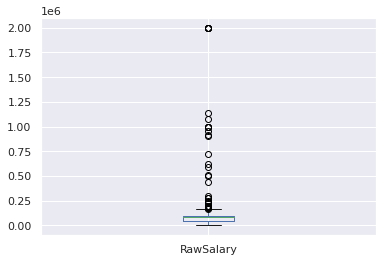

In [23]:
df_stack["RawSalary"].plot.box()

In [38]:
##### Q. Check for any outliers in the 'RawSalary' column and handle them wisely
q1 = df_stack["RawSalary"].quantile(.25)
q3 = df_stack["RawSalary"].quantile(.75)
IQR = q3 -q1
out_min = q1 - 1.5 * IQR
out_max = q3 + 1.5 * IQR
df_stack = df_stack[(df_stack["RawSalary"] >= out_min) & (df_stack["RawSalary"] <= out_max)]
df_stack

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,92565.169925
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,70841.000000
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,92565.169925
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,21426.000000
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,41671.000000
...,...,...,...,...,...,...,...,...,...,...,...
993,3/4/18 19:11,Some college/university study without earning ...,30000.0,Yes,India,0.0,Git,28,5,Male,30000.000000
994,10/19/18 13:50,Some college/university study without earning ...,NaN,Yes,France,NaN,Subversion,45,10,Male,92565.169925
995,4/14/18 15:31,Bachelor's degree (BA. BS. B.Eng.. etc.),58746.0,No,Spain,8.0,Git,27,16,Male,58746.000000
996,3/21/18 6:34,Bachelor's degree (BA. BS. B.Eng.. etc.),55000.0,Yes,USA,NaN,Git,54,16,Male,55000.000000


In [25]:
## Feature Scaling & Normalizing Exercises

In [27]:
# normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc.fit_transform(df_stack[["Age"]])

array([[0.04615385],
       [0.30769231],
       [0.41538462],
       [0.43076923],
       [0.32307692],
       [0.32307692],
       [0.24615385],
       [0.09230769],
       [0.07692308],
       [0.27692308],
       [0.12307692],
       [0.36923077],
       [0.        ],
       [0.2       ],
       [0.04615385],
       [0.06153846],
       [0.35384615],
       [0.56923077],
       [0.2       ],
       [0.32307692],
       [0.01538462],
       [0.15384615],
       [0.49230769],
       [0.        ],
       [0.        ],
       [0.18461538],
       [0.75384615],
       [0.32307692],
       [0.26153846],
       [0.35384615],
       [0.18461538],
       [0.38461538],
       [0.30769231],
       [0.26153846],
       [0.36923077],
       [0.52307692],
       [0.64615385],
       [0.81538462],
       [0.24615385],
       [0.06153846],
       [0.38461538],
       [0.        ],
       [0.26153846],
       [0.18461538],
       [0.04615385],
       [0.43076923],
       [0.04615385],
       [0.2  

In [29]:
# standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(df_stack[["Age"]])

array([[-1.13243108e+00],
       [ 1.50733921e-01],
       [ 6.79095982e-01],
       [ 7.54576276e-01],
       [ 2.26214216e-01],
       [ 2.26214216e-01],
       [-1.51187256e-01],
       [-9.05990200e-01],
       [-9.81470494e-01],
       [-2.26667551e-04],
       [-7.55029611e-01],
       [ 4.52655099e-01],
       [-1.35887197e+00],
       [-3.77628139e-01],
       [-1.13243108e+00],
       [-1.05695079e+00],
       [ 3.77174804e-01],
       [ 1.43389893e+00],
       [-3.77628139e-01],
       [ 2.26214216e-01],
       [-1.28339167e+00],
       [-6.04069023e-01],
       [ 1.05649745e+00],
       [-1.35887197e+00],
       [-1.35887197e+00],
       [-4.53108434e-01],
       [ 2.33966246e+00],
       [ 2.26214216e-01],
       [-7.57069619e-02],
       [ 3.77174804e-01],
       [-4.53108434e-01],
       [ 5.28135393e-01],
       [ 1.50733921e-01],
       [-7.57069619e-02],
       [ 4.52655099e-01],
       [ 1.20745804e+00],
       [ 1.81130040e+00],
       [ 2.64158364e+00],
       [-1.5

In [ ]:
Feature Encoding Exercises
Q. How about encoding the data in the 'Hobby' / 'Gender' column

In [32]:
# hobby get dummies
pd.get_dummies(df_stack["Hobby"], drop_first=True)

,Yes
0,1
1,1
2,0
3,1
4,1
...,...
994,1
995,0
996,1
997,1


In [42]:
# Gender  Label Encoding
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df_stack["Gender"] = enc.fit_transform(df_stack[["Gender"]].astype(str))
df_stack["Gender"]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0      3
1      3
2      7
3      3
4      3
      ..
993    3
994    3
995    3
996    3
997    7
Name: Gender, Length: 963, dtype: int64

In [ ]:
## Splitting Training & Testing

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_stack[["Country"]], df_stack["Hobby"], test_size=0.30, random_state=42)

In [46]:
X_train.shape

(770, 1)

In [47]:
X_test.shape

(193, 1)

In [48]:
y_train.shape

(770,)

In [49]:
y_test.shape

(193,)

---------------------------------------